## 모델링 하기

#### 컬럼 : T-Shir, Trouser, Shirt

#### 사용모델 : VGGNet / kaggle.copy 모델2

#### 이미지강화 사용 : False


In [2]:
#라이브러리 가져오기
import cv2
import numpy as np
from tensorflow.keras.models import load_model, save_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import sys
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline
# np행렬 생략 부분 출력 펼쳐서 보기 옵션
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [3]:
#데이터 분류하기
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# sorting based on index
idx = np.argsort(train_labels)
train_images = train_images[idx]
train_labels = train_labels[idx]

idx = np.argsort(test_labels)
test_images = test_images[idx]
test_labels = test_labels[idx]

labels = ["T-Shirt", "Trouser", "Pullover", "Dress", "Coat", 
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

label_mapping = dict(zip(labels, range(10)))

def get_data(mapping, classes):
    # X_train, X_test, y_train, y_test = np.array([]), np.array([]), np.array([]), np.array([])
    X_train, X_test, y_train, y_test = [],[],[],[]
    for cls in classes:
        idx = mapping[cls]
        start = idx*6000
        end = idx*6000+6000
        X_train.append(train_images[start: end])
        # X_train = np.append(X_train, train_images[start: end])
        y_train.append(train_labels[start: end])
        # y_train = np.append(X_train, train_labels[start: end])
        start = idx*1000
        end = idx*1000+1000
        X_test.append(test_images[start: end])
        # X_test = np.append(X_test, test_images[start: end])
        y_test.append(test_labels[start: end])
        # y_test = np.append(y_test, test_labels[start: end])
    return X_train, X_test, y_train, y_test


train_X, test_X, train_Y, test_Y = get_data(label_mapping,
                                            classes=["T-Shirt", "Trouser", "Shirt"])

test_Y

4423680/4422102 [==============================] - 0s 0us/step


[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [4]:
#레이어 넘버 변환
empty_array1 = np.array([])
# print(type(d))
for arr in test_Y:
    # print(type(arr))
    if arr[0] == 6:
        arr[:] = 2
    empty_array1 = np.append(empty_array1,arr)
test_Y = empty_array1

# train_Y 5개의 어레이를 1개의 어레이로 만들기
empty_array2 = np.array([])

for arr in train_Y:
    if arr[0] == 6:
        arr[:] = 2
    empty_array2 = np.append(empty_array2, arr)
train_Y = empty_array2

test_Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [5]:
#test_X 리스트를 하나의 array로 만들기

for idx, img in enumerate(test_X):
    if idx == 0 :
        test_img0 = img
    elif idx == 1:
        test_img1 = img
    else:
        test_img2 = img
print(test_img0.shape, test_img1.shape, test_img2.shape)

# train_X 리스트를 하나의 array로 만들어 주기 위해서 컬럼 별로 나누는 과정
for idx, img in enumerate(train_X):
    if idx == 0 :
        train_img0 = img
    elif idx == 1:
        train_img1 = img
    else:
        train_img2 = img
print(train_img0.shape, train_img1.shape, train_img2.shape)


(1000, 28, 28) (1000, 28, 28) (1000, 28, 28)
(6000, 28, 28) (6000, 28, 28) (6000, 28, 28)


In [6]:
# test_X 하나로 합쳐주는 과정 1번만 진행 해야 합니다.
test_img0 = np.vstack((test_img0, test_img1))
test_X = np.vstack((test_img0, test_img2))

# train_X 하나로 합쳐주는 과정
train_img0 = np.vstack((train_img0, train_img1))
train_X = np.vstack((train_img0, train_img2))

print(train_X.shape, test_X.shape)

(18000, 28, 28) (3000, 28, 28)


In [7]:
train_X.shape, test_X.shape, train_Y.shape, test_Y.shape

((18000, 28, 28), (3000, 28, 28), (18000,), (3000,))

In [8]:
# 밑에 vggnet 모방 코드 사용 하려면 여기 셀 실행 해야함/ input 을 맞춰주기 위함.

print(train_X.shape, test_X.shape)
# (미니배치크기, 입력이미지행수, 입력이미지열수, 입력이미지체널수)
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
print(train_X.shape, test_X.shape)

(18000, 28, 28) (3000, 28, 28)
(18000, 28, 28, 1) (3000, 28, 28, 1)


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(
rotation_range = 10,
zoom_range = 0.10,
shear_range = 0.5,
width_shift_range = 0.10,
height_shift_range = 0.10,
horizontal_flip = True,
vertical_flip = False)

augment_size = 6000
# 원본 이미지 무작위 선택 및 데이터 복사
x_choice = np.random.choice(train_X.shape[0], size = augment_size, replace=False)
x_augmented = train_X[x_choice].copy()
y_augmented = train_Y[x_choice].copy()
# 이미지를 변형할 원본 이미지를 찾기 위한 함수 예제 (중복허용O / 중복허용x)
print(np.random.randint(train_X.shape[0], size = augment_size))
print(np.random.choice(train_X.shape[0], size = augment_size, replace=False))

[ 2340   412 11020 15264 12040  1630  3841  8510  4733 16799  1587 13372 10797   616  5051 10170  1148 13568 10325  7460  6981  1794  9231  5606 12682 14327  3271  8481 11401 17288 15065  3747  5680 11736  1602  7133  8226  2019  1357  4813  6641   423 14936 13867 13906 12747 11360 10122 11855 17552 12230  3515  1708 15448  7855 12163 17184  5911  3273  8206  6782  6326  2153  3074 11343  6728 16722 12800 16422  2278 13046  3774  8636  7435 14730 12548 15795 13580   352  5472  8188 12185  4769 10130  3578  8923  3929  3950  6969  8239  8215  6322 10157 15398 11096  6980  1571  9109 17328  4656 10677 12789 14672  6656 13136 14529 13209 12913  1985 10839  3867 15780 13331  3112  8144 15818  8363 11303  4922  3674 17263 12913  8166 15479  4383 15123  5713  3997  4168 13798  9562 14235 12486 10881 17917   458 14301  2272  7971   410  4495 17043 11529   293 16877 17138 10028 15097 17940 13673  1818  7551 17550 14445  3672 11934  4998  5328  6039 14580 16299  3244  2998 11368  7983  2074 169

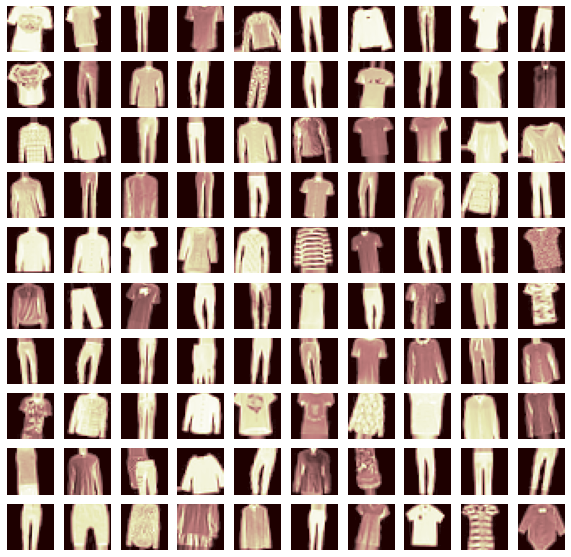

In [10]:
# 보강 이미지 데이터 생성
x_augmented = image_generator.flow(x = x_augmented,
y = np.zeros(augment_size),
batch_size = augment_size,
shuffle = False).next()[0]
#보강 이미지 확인
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.axis('off')
    plt.imshow(x_augmented[i].reshape(28,28), cmap='pink')
plt.show()

In [11]:
#데이터 합쳐주기
train_X = np.concatenate((train_X,x_augmented))
train_Y = np.concatenate((train_Y,y_augmented))
#보강 데이터 결합 확인
print(train_X.shape)


(24000, 28, 28, 1)


In [12]:
# shuffle 해주기 위해 trian test 통으로 묶어서 셔플 가능?
from sklearn.utils import shuffle
train_X, train_Y = shuffle(train_X, train_Y)
test_X, test_Y = shuffle(test_X, test_Y)

In [13]:
#min-max-regulation 최소 최대값 데이터 평준화
train_X = train_X / 255.0
test_X = test_X / 255.0
# print(train_X[2])

In [105]:
# vggnet 모방 모델
model= tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=32,padding='same',activation='relu'),
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=64,padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 256, padding = 'valid', activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.4),
    tf.keras.layers.Dense(units=256, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=3, activation = 'softmax')
])

In [92]:
# Model2
model2= tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=32,kernel_initializer='he_normal',activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 64, activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 128, activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation = 'relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=3, activation = 'softmax')                 
])

In [106]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 6, 6, 256)       

In [107]:
history = model.fit(train_X, train_Y, epochs=500, validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')])

Epoch 1/500
600/600 [==============================] - 11s 18ms/step - loss: 0.3389 - accuracy: 0.8549 - val_loss: 0.2465 - val_accuracy: 0.8963
Epoch 2/500
600/600 [==============================] - 10s 17ms/step - loss: 0.2519 - accuracy: 0.8891 - val_loss: 0.2388 - val_accuracy: 0.9035
Epoch 3/500
600/600 [==============================] - 10s 17ms/step - loss: 0.2247 - accuracy: 0.9021 - val_loss: 0.2025 - val_accuracy: 0.9117
Epoch 4/500
600/600 [==============================] - 10s 17ms/step - loss: 0.2039 - accuracy: 0.9086 - val_loss: 0.1859 - val_accuracy: 0.9198
Epoch 5/500
600/600 [==============================] - 10s 17ms/step - loss: 0.1976 - accuracy: 0.9140 - val_loss: 0.1804 - val_accuracy: 0.9235
Epoch 6/500
600/600 [==============================] - 10s 17ms/step - loss: 0.1813 - accuracy: 0.9204 - val_loss: 0.1823 - val_accuracy: 0.9206
Epoch 7/500
600/600 [==============================] - 10s 17ms/step - loss: 0.1668 - accuracy: 0.9251 - val_loss: 0.1749 - val_ac

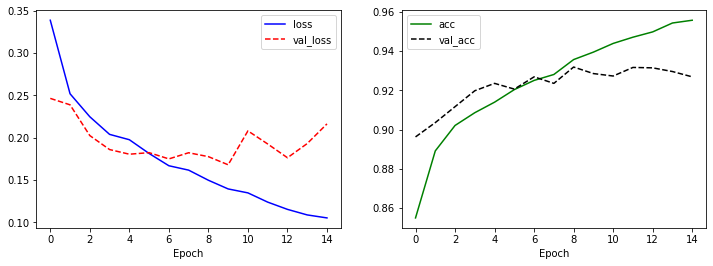

In [108]:
#모델 학습 후 로스값과 정확도의 이미지 처리
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label = 'acc')
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [109]:
model.evaluate(test_X,test_Y)

94/94 [==============================] - 1s 7ms/step - loss: 0.2319 - accuracy: 0.9250


[0.23193176090717316, 0.925000011920929]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


(150, 125, 3)
########################################
VERSION : 1.1 
 Interesting tools to be added to the workflow pipe!!!
########################################


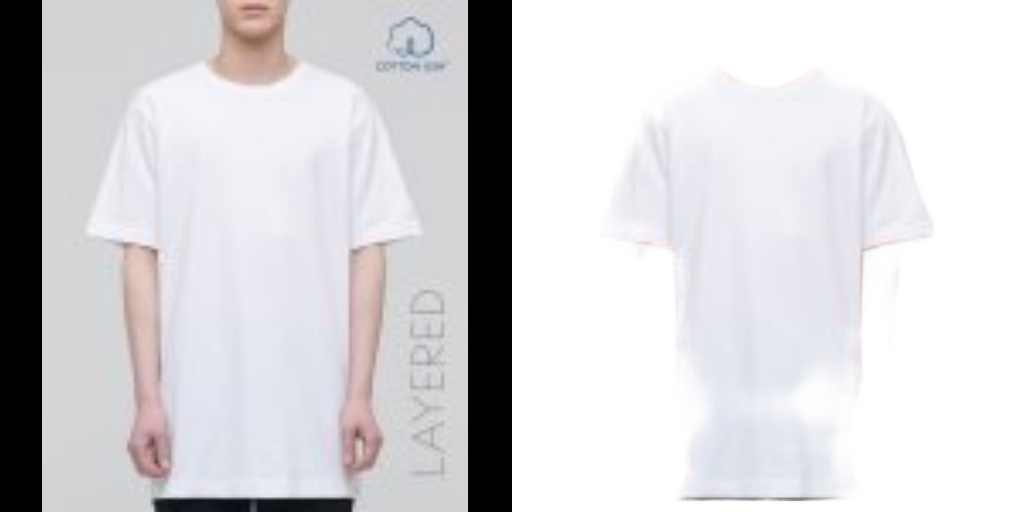

In [112]:
# 모델 임포트 후 의상 부분만 추출하는 코드.

# GPU메모리 증가 허용하기 코드..내가 알아야할 필요가 있을지..? 뭔 이야기인지는 모르겠음.
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# 이미지를 계속해서 바꿔바며 할수 있는 방법을 생각해야함 요기 f는 경로 입력.
f = '/content/drive/My Drive/test_1/tshirts_images/tshirt0_15.jpg'
# 훈련된 모델 가지고 오는 경로 설정.
saved = load_model("/content/drive/My Drive/fAIshion_P/topwears.h5")

class fashion_tools(object):
    def __init__(self,imageid,model,version=1.1):
        self.imageid = imageid
        self.model   = model
        self.version = version
        
    def get_dress(self,stack=False):
        """limited to top wear and full body dresses (wild and studio working)"""
        """takes input rgb ----> return PNG"""

        name =  self.imageid
        file = cv2.imread(name)
        print(file.shape)

        # b,g,r= cv2.split(file)
        # file = cv2.merge([b,g,r])

        file = tf.image.resize_with_pad(file,target_height=512,target_width=512)
        rgb  = file.numpy()
        file = np.expand_dims(file,axis=0)/ 255.
        seq = self.model.predict(file)
        seq = seq[3][0,:,:,0]
        seq = np.expand_dims(seq,axis=-1)
        c1x = rgb*seq
        c2x = rgb*(1-seq)
        cfx = c1x+c2x
        dummy = np.ones((rgb.shape[0],rgb.shape[1],1))
        rgbx = np.concatenate((rgb,dummy*255),axis=-1)
        rgbs = np.concatenate((cfx,seq*255.),axis=-1)
        if stack:
            stacked = np.hstack((rgbx,rgbs))
            return stacked
        else:
            return rgbs
        
    def get_patch(self):
        return None

    def development(self):
        n_ = '\n'
        return (f"VERSION : {self.version} {n_} Interesting tools to be added to the workflow pipe!!!")

###running code
api    = fashion_tools(f,saved)
image = api.get_dress(True)

print("########################################")
print(api.development())
print("########################################")

# cv2.imwrite('result.jpeg', image_)
cv2_imshow(image)
# print(image.shape)

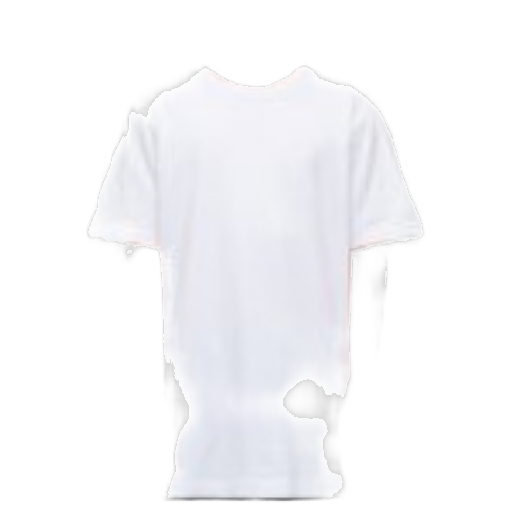

In [113]:
# 이미지 자르고, 투명값 검정배경 입혀주기.

image_crop = image[:,512:]
image_crop = np.uint8(image_crop)
# cv2_imshow(image_crop)

for i in image_crop:
    for j in i:
        if j[3] < 40:
            j[0] = 0
            j[1] = 0
            j[2] = 0

cv2_imshow(image_crop)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 243 243 230   0   0 238 241 240   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 227 245 245 244 242 240 240 240 242 243 243 231   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 229 239 242 243 244 243 243 242 243 243 242 242 241 226   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 231 223 238 240 241 242 242 242 243 242 241 241 226 217   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 233 238 225 235 234 238 241 242 242 240 240 229 235 22

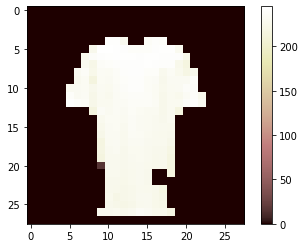

(1, 28, 28, 1)

In [114]:
# 리사이즈 인풋값 맞춰 주기.
image_resize = cv2.resize(image_crop, (28,28))
cv2_imshow(image_resize)

# 그레이 스케일.. 후 픽셀 출력..
image_gray = cv2.cvtColor(image_resize, cv2.COLOR_BGRA2GRAY)
cv2_imshow(image_gray)
print(image_gray)

# 조금 더 크게 시각화..
plt.imshow(image_gray, cmap='pink')
plt.colorbar()
plt.show()

# 정규화 해준다.
input_image = image_gray/255.0

# input값이 3차원 이여서 차원을 늘려준다.
input_image = np.reshape(input_image, (1,28,28,1))
input_image.shape

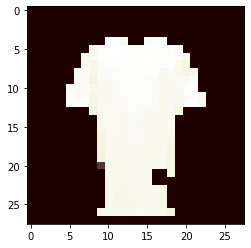

[[1.9394367 1.0000002 1.0605631]]


In [115]:
#예측 수행
input_predict = model.predict(input_image)+1
#예측 이미지 확인 
plt.imshow(input_image.reshape(28,28), cmap = 'pink')
plt.show()

#예측 결과 확인
print(input_predict)

In [116]:
max_value = np.max(input_predict)
# print(max_value)
max_idx = np.where(input_predict == max_value)
# print(max_idx)
# print(max_idx[1][0])
predict_idx = max_idx[1][0]
predict_idx

0